# New Section

In [1]:
import numpy as n
import matplotlib.pyplot as plt
import skfuzzy

# Define membership functions

In [2]:
def Tri_MF(val,low,mid,high):
    retVal = 0
    if val < high and val > low: 
        if val < mid:
            retVal = (val - low) / (mid-low)
        elif val == mid:
            retVal = 1
        elif val > mid:
            retVal= (high - val)/(high - mid)
    return retVal

In [3]:
#Membership functions
# Service - Bad, Average, Good , very good
# Food Quality - Bad, Average , Good , very good
# Tip - Very less, less, decent, more (in percentage)
service = n.arange(0,11,1)
foodQuality = n.arange(0,11,1)
Tip = n.arange(0,14,1)

Bad = [0,1,3]
Average = [2,5,6]
Good = [5,7,8]
VeryGood = [7,9,10]

VeryLess = [0,1,3]
Less = [2,4,6]
Decent = [5, 7, 9]
More = [8, 10, 13]

# Arrays for plotting
a_bad = skfuzzy.trimf(service,Bad)
a_avg = skfuzzy.trimf(service,Average)
a_good = skfuzzy.trimf(service, Good)
a_vgood = skfuzzy.trimf(service,VeryGood)

a_bad_1 = skfuzzy.trimf(foodQuality,Bad)
a_avg_1 = skfuzzy.trimf(foodQuality,Average)
a_good_1 = skfuzzy.trimf(foodQuality, Good)
a_vgood_1 = skfuzzy.trimf(foodQuality,VeryGood)

c_vless = skfuzzy.trimf(Tip,VeryLess)
c_less = skfuzzy.trimf(Tip,Less)
c_decent = skfuzzy.trimf(Tip,Decent)
c_more = skfuzzy.trimf(Tip,More)

#get crisp input
flag = 1
print("Enter the service and food quality rating (0-10) with ) as least")
while flag:
    x0 = float(input("Service: ") or "5.5")
    y0 = float(input("Rating: ") or "7.5")
    if x0<= 10 and x0 >= 0 and y0<= 10 and y0 >= 0:
        flag = 0
    else:
        print("Values to be in range 0 - 10. Re enter")
        


Enter the service and food quality rating (0-10) with ) as least
Service: 
Rating: 


In [4]:
print(x0,y0)

5.5 7.5


In [5]:
alpha = []

alpha.insert(0,Tri_MF(x0,Bad[0], Bad[1], Bad[2]))
alpha.insert(1,Tri_MF(x0,Average[0],Average[1],Average[2]))
alpha.insert(2,Tri_MF(x0,Good[0],Good[1],Good[2]))
alpha.insert(3,Tri_MF(x0,VeryGood[0],VeryGood[1],VeryGood[2]))

alpha

[0, 0.5, 0.25, 0]

In [6]:
beta = []

beta.insert(0,Tri_MF(y0,Bad[0], Bad[1], Bad[2]))
beta.insert(1,Tri_MF(y0,Average[0],Average[1],Average[2]))
beta.insert(2,Tri_MF(y0,Good[0],Good[1],Good[2]))
beta.insert(3,Tri_MF(y0,VeryGood[0],VeryGood[1],VeryGood[2]))

beta

[0, 0, 0.5, 0.25]

## **Rules**

In [7]:
# define rules and give corresponding x, y and z for the combinations
gamma =[]
ai =[]
bi =[]
ci = []

gamma.insert(0,min(alpha[0],beta[0])) 
ci.insert(0,VeryLess)
ai.insert(0,Bad)
bi.insert(0,Bad)
gamma.insert(1,min(alpha[0],beta[1]))
ci.insert(1,VeryLess)
ai.insert(1,Bad)
bi.insert(1,Average)
gamma.insert(2,min(alpha[0],beta[2]))
ci.insert(2,Less)
ai.insert(2,Bad)
bi.insert(2,Good)
gamma.insert(3,min(alpha[0],beta[3]))
ci.insert(3,Decent)
ai.insert(3,Bad)
bi.insert(3,VeryGood)
gamma.insert(4,min(alpha[1],beta[1]))
ci.insert(4,Less)
ai.insert(4,Average)
bi.insert(4,Average)
gamma.insert(5,min(alpha[1],beta[2]))
ci.insert(5,Less)
ai.insert(5,Average)
bi.insert(5,Good)
gamma.insert(6,min(alpha[1],beta[3]))
ci.insert(6,Decent)
ai.insert(6,Average)
bi.insert(6,VeryGood)
gamma.insert(7,min(alpha[2],beta[2]))
ci.insert(7,Decent)
ai.insert(7,Good)
bi.insert(7,Good)
gamma.insert(8,min(alpha[2],beta[3]))
ci.insert(8,Decent)
ai.insert(8,Good)
bi.insert(8,VeryGood)
gamma.insert(9,min(alpha[3],beta[3]))
ci.insert(9,More)
ai.insert(9,VeryGood)
bi.insert(9, VeryGood)

print("Gamma",gamma)
print("Consequences",ci)
print("Antecedent 1",ai)
print("Antecedent 2",bi)


Gamma [0, 0, 0, 0, 0, 0.5, 0.25, 0.25, 0.25, 0]
Consequences [[0, 1, 3], [0, 1, 3], [2, 4, 6], [5, 7, 9], [2, 4, 6], [2, 4, 6], [5, 7, 9], [5, 7, 9], [5, 7, 9], [8, 10, 13]]
Antecedent 1 [[0, 1, 3], [0, 1, 3], [0, 1, 3], [0, 1, 3], [2, 5, 6], [2, 5, 6], [2, 5, 6], [5, 7, 8], [5, 7, 8], [7, 9, 10]]
Antecedent 2 [[0, 1, 3], [2, 5, 6], [5, 7, 8], [7, 9, 10], [2, 5, 6], [5, 7, 8], [7, 9, 10], [5, 7, 8], [7, 9, 10], [7, 9, 10]]


In [8]:
# Converting Mamdani to Takagi Sugeno 
a1 = [] 
b1 = []
c1 = []

for index in range(0,10):
  a1.insert (index,(ci[index][2] - ci[index][0])/(ai[index][2] - ai[index][0]))
  b1.insert(index,(ci[index][2] - ci[index][0])/(bi[index][2] - bi[index][0]))
  c1.insert(index, (ci[index][1] - a1[index] * ai[index][1] - b1[index] * bi[index][1]))

num = denom =0
for i in range(len(c1)):
  x = (a1[i]*float(x0)) + (b1[i]*float(y0)) + c1[i]
  num += gamma[i] * x
  denom += gamma[i]

output = num/ denom
print("Predicted Tip: " ,output, "%")



Predicted Tip:  4.9 %


### GRAPHS

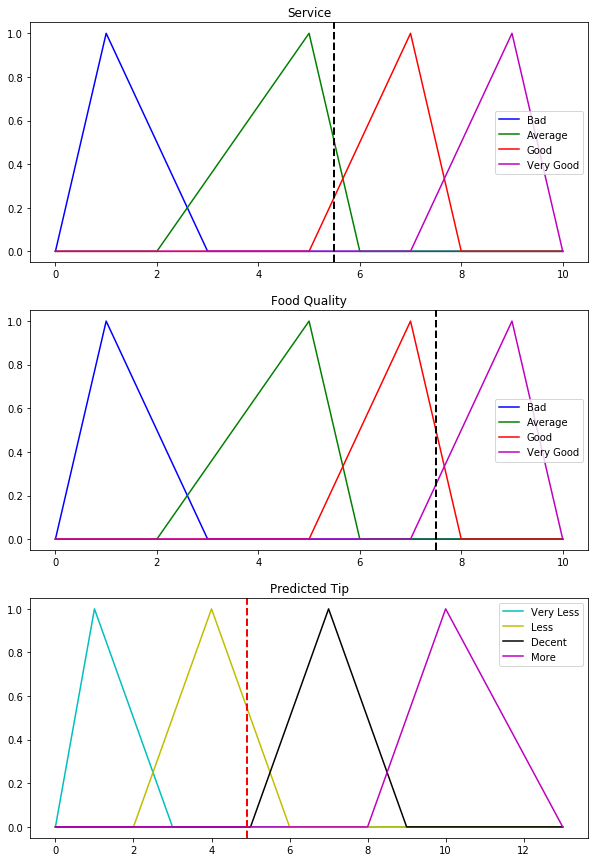

In [9]:
fig, (input1, input2, output2) = plt.subplots(nrows=3, figsize=(10, 15))
input1.plot(service, a_bad, 'b', linewidth=1.5, label='Bad')
input1.plot(service, a_avg, 'g', linewidth=1.5, label='Average')
input1.plot(service, a_good, 'r', linewidth=1.5, label='Good')
input1.plot(service, a_vgood, 'm', linewidth=1.5, label='Very Good')
input1.axvline(x=x0, ymin=0, ymax=1, color='k',linewidth=2,linestyle='--')
input1.set_title('Service')
input1.legend()

input2.plot(foodQuality, a_bad_1, 'b', linewidth=1.5, label='Bad')
input2.plot(foodQuality, a_avg_1, 'g', linewidth=1.5, label='Average')
input2.plot(foodQuality, a_good_1, 'r', linewidth=1.5, label='Good')
input2.plot(foodQuality, a_vgood_1, 'm', linewidth=1.5, label='Very Good')
input2.axvline(x=y0, ymin=0, ymax=1, color='k',linewidth=2,linestyle='--')
input2.set_title('Food Quality')
input2.legend()

output2.plot(Tip, c_vless, 'c', linewidth=1.5, label='Very Less')
output2.plot(Tip, c_less, 'y', linewidth=1.5, label='Less')
output2.plot(Tip, c_decent, 'k', linewidth=1.5, label='Decent')
output2.plot(Tip, c_more, 'm', linewidth=1.5, label='More')
output2.axvline(x=output, ymin=0, ymax=1, color='r',linewidth=2,linestyle='--')
output2.set_title('Predicted Tip')
output2.legend()

plt.show()